In [1]:
import openpyxl

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index=pd.read_csv("data2.csv")

In [4]:
df_index.head()

,Unnamed: 0,year,interest_rate,unemployment_rate,index_price
0,0,2017,2.75,5.3,1464
1,1,2017,2.50,5.3,1394
2,2,2017,2.50,5.3,1357
3,3,2017,2.50,5.3,1293
4,4,2017,2.50,5.4,1256


In [5]:
##Drop uneccessary columns
df_index.drop(columns=["Unnamed: 0","year"],axis=1,inplace=True)

In [6]:
df_index

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.25,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.00,5.6,1167


In [7]:
##Check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

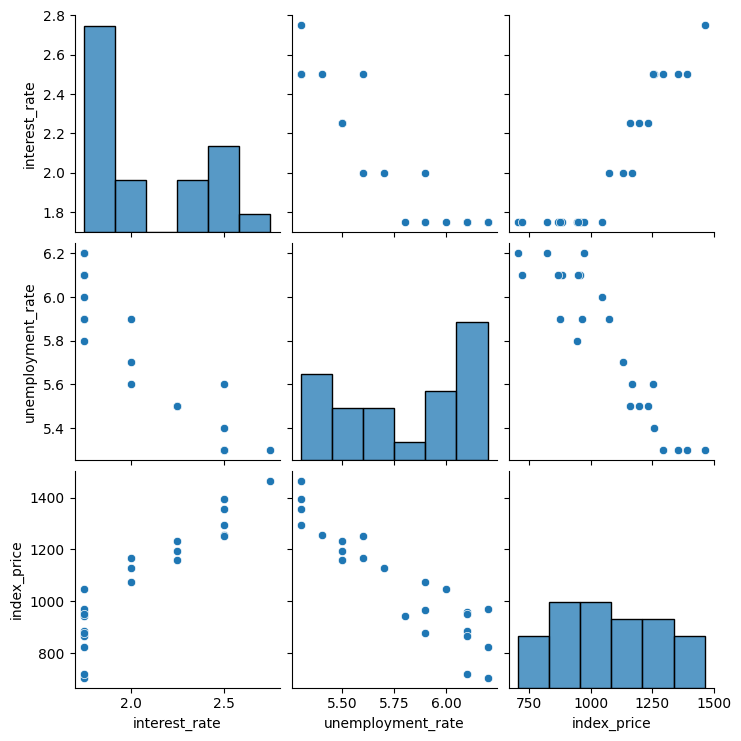

In [8]:
##Let's do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.921417,0.917442
unemployment_rate,-0.921417,1.000000,-0.922338
index_price,0.917442,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

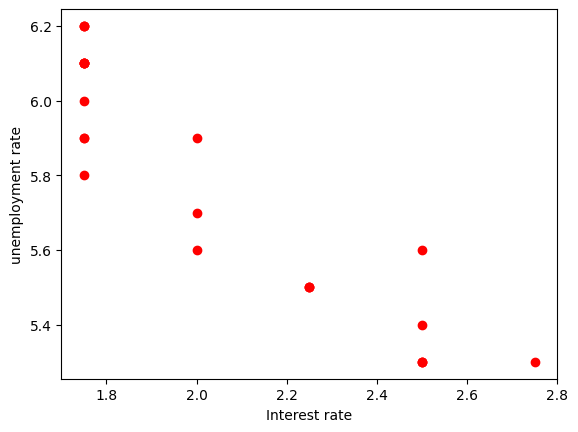

In [10]:
##Visualise the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [11]:
##Independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [14]:
##Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
import seaborn as sns 

<Axes: xlabel='interest_rate', ylabel='index_price'>

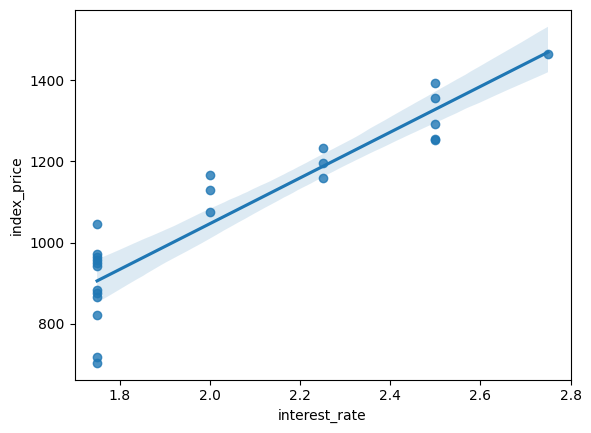

In [16]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

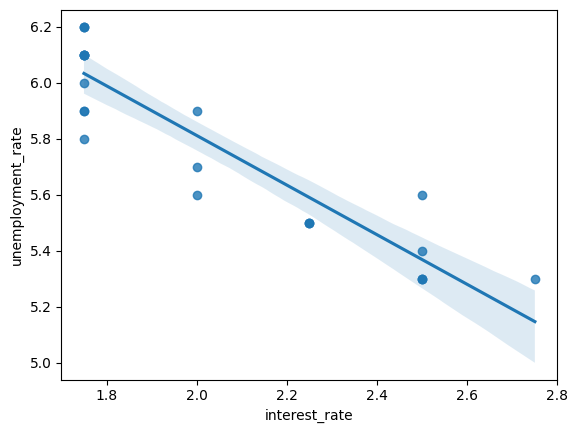

In [17]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

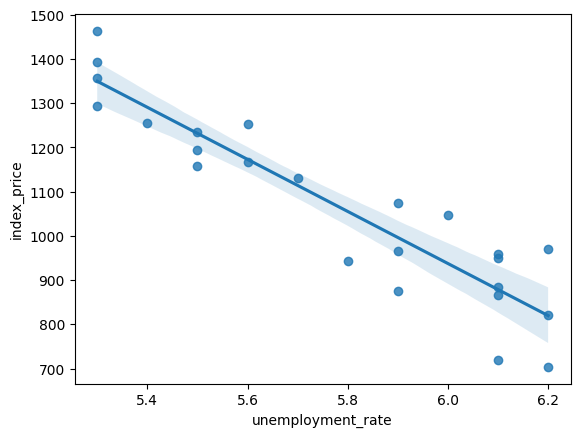

In [18]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['index_price'])

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
X_train

array([[-0.83624201,  0.37908503],
       [ 1.42161142, -1.48187786],
       [-0.83624201,  1.30956648],
       [ 1.42161142, -0.55139641],
       [ 1.42161142, -1.48187786],
       [-0.83624201,  0.68924552],
       [-0.83624201,  0.999406  ],
       [ 1.42161142, -1.48187786],
       [ 1.42161142, -1.17171738],
       [-0.83624201,  1.30956648],
       [-0.83624201,  0.999406  ],
       [-0.83624201,  0.37908503],
       [-0.83624201,  0.999406  ],
       [ 0.66899361, -0.8615569 ],
       [-0.0836242 , -0.24123593],
       [-0.83624201,  0.06892455],
       [-0.83624201,  0.999406  ],
       [ 0.66899361, -0.8615569 ]])

In [22]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [23]:
regression.fit(X_train,y_train)

LinearRegression()

In [24]:
##Cross validation

from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [25]:
np.mean(validation_score)

np.float64(-6722.432097868077)

In [26]:
##Prediction
y_pred=regression.predict(X_test)

In [27]:
y_pred

array([1198.08082904,  807.12285985, 1374.28287524,  850.07404445,
        981.12625215, 1109.97980594])

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8274.457377226534
79.58249856876633
90.96404441990546


In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
print(1 - (1 - score)*(len(y_test)-1)-(len(y_test)-X_test.shape[1]-1))

0.7542094368806107
-3.2289528155969465


**Assumptions**


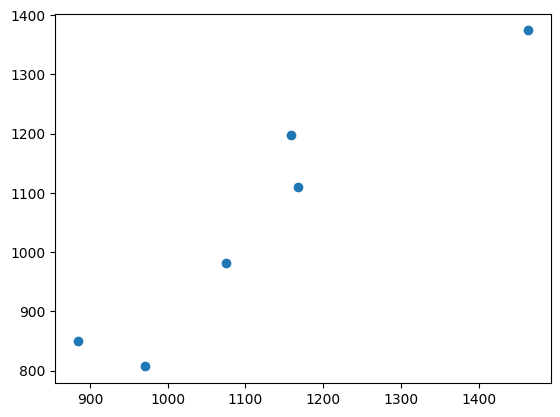

In [31]:
plt.scatter(y_test,y_pred)

In [32]:
residuals=y_test-y_pred
print(residuals)

8     -39.080829
16    163.877140
0      89.717125
18     33.925956
11     93.873748
9      57.020194
Name: index_price, dtype: float64


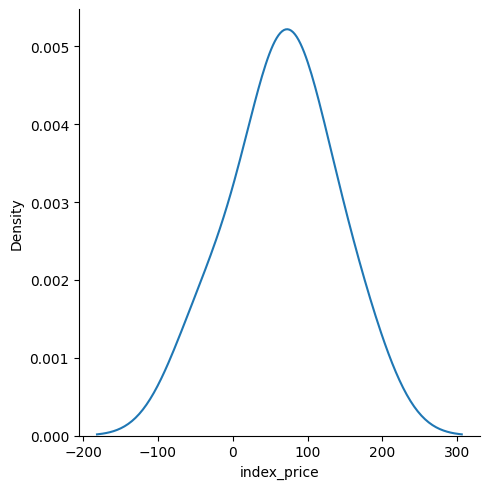

In [33]:
##Plot the residuals
sns.displot(residuals,kind='kde')

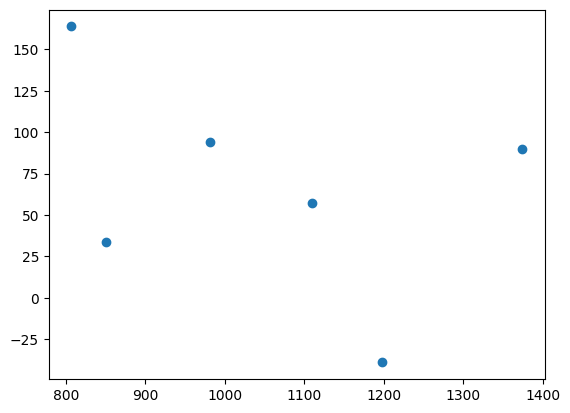

In [34]:
##Scatter plot wrt predictions and residuals
plt.scatter(y_pred,residuals)

In [35]:
print(regression.coef_)

[  62.05251771 -139.54545438]


In [36]:
##OLS linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)
print(model.summary())

[ 144.6363846  -246.32158459  320.8384308  -203.3704      -72.3181923
   56.53536149]
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.087
Method:                 Least Squares   F-statistic:                             0.2827
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                       0.757
Time:                        13:19:44   Log-Likelihood:                         -150.86
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err  

c:\Users\admin\OneDrive\Desktop\Lipita.ipynb\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
